<a href="https://colab.research.google.com/github/Jackil1993/GPT3_SCM/blob/main/inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1: 2 items are sold
Day 2: 3 items are sold
Day 3: 1 items are sold
Day 4: 3 items are sold
Day 5: 1 items are sold
Day 5: a new order is placed
Day 6: 5 items are sold
Day 7: 0 items are sold
Day 8: 2 items are sold
Day 9: 2 items are sold
Day 10: 9 items are sold
Day 11: 2 items are sold. 2 is lost in sales
Day 11: 30 items have been delivered
Day 12: 7 items are sold
Day 13: 3 items are sold
Day 13: a new order is placed
Day 14: 8 items are sold
Day 15: 0 items are sold
Day 16: 2 items are sold
Day 17: 3 items are sold
Day 18: 3 items are sold
Day 19: 0 items are sold
Day 19: 30 items have been delivered
Day 20: 12 items are sold
Day 21: 1 items are sold
Day 22: 0 items are sold
Day 23: 1 items are sold
Day 23: a new order is placed
Day 24: 8 items are sold
Day 25: 6 items are sold
Day 26: 6 items are sold. 8 is lost in sales
Day 27: 0 items are sold
Day 28: 0 items are sold. 4 is lost in sales
Day 29: 0 items are sold. 7 is lost in sales
Day 29: 30 items have been delivered
Day

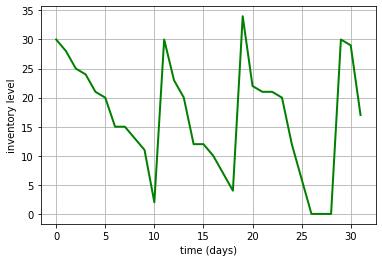

In [1]:
# -*- coding: utf-8 -*-
"""inventory.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1V9m9pyiXz1ulJDgzcPaZvAkqaIAslFo_
"""

from numpy import random 
import matplotlib.pyplot as plt

time = 0 #days
storage = 30 
lead = 6 #days
r = 20 #reorder point
Q = 30 #reorder quantity 
status = False #is order placed?
next_delivery = float('inf')
inv_hist = [storage]
timings = [0]

def generate_demand(average=5):
  return round(random.exponential(average))

def fulfill():
  global time, storage
  demand = generate_demand()
  if demand <= storage:
    storage -= demand
    print('Day {}: {} items are sold'.format(time, demand))
  else:
    print('Day {}: {} items are sold. {} is lost in sales'.format(time, storage, demand-storage))
    storage = 0   

def order():
  global time, storage, lead, r, status, next_delivery
  if storage <= r and status == False:
    status = True 
    next_delivery = time + lead
    print('Day {}: a new order is placed'.format(time))

def delivery():
  global time, storage, lead, Q, status, next_delivery
  if status == True and next_delivery == time:
    storage += Q
    status = False
    next_delivery = float('inf')
    print('Day {}: {} items have been delivered'.format(time, Q))

def advance_time():
  global time, storage
  time += 1
  fulfill()
  order()
  delivery()
  inv_hist.append(storage)
  timings.append(time)

while time < 31:
  advance_time()

plt.plot(timings, inv_hist, color='green', linewidth=2)
plt.grid()
plt.xlabel('time (days)')
plt.ylabel('inventory level')
plt.show()